***
<div style="text-align:center">
     <h1 align="center">
         <i class="fas fa-calendar-day" aria-hidden="true">  Day 10 of #3D_vision_journey </i>
    </h1>      
</div>

<h3 style='text-align: center;'>
    <img  src="../images/open3d_logo.png" height="50"/>     
</h3>

* Load the libraries

In [1]:
import open3d as o3d
import numpy as np
import time
import open3d_tutorial as o3dtut

draw_bit = 1 # draw it or not!

### Create a spheres from key points

In [12]:
def keypoints_to_spheres(keypoints):
    spheres = o3d.geometry.TriangleMesh()
    for keypoint in keypoints.points:
        sphere = o3d.geometry.TriangleMesh.create_sphere(radius=0.002)
        sphere.translate(keypoint)
        spheres += sphere
    spheres.paint_uniform_color([1.0, 0.75, 0.0])
    return spheres

###  Load Armadillo mesh

Load a point cloud , paint it gray, and render it


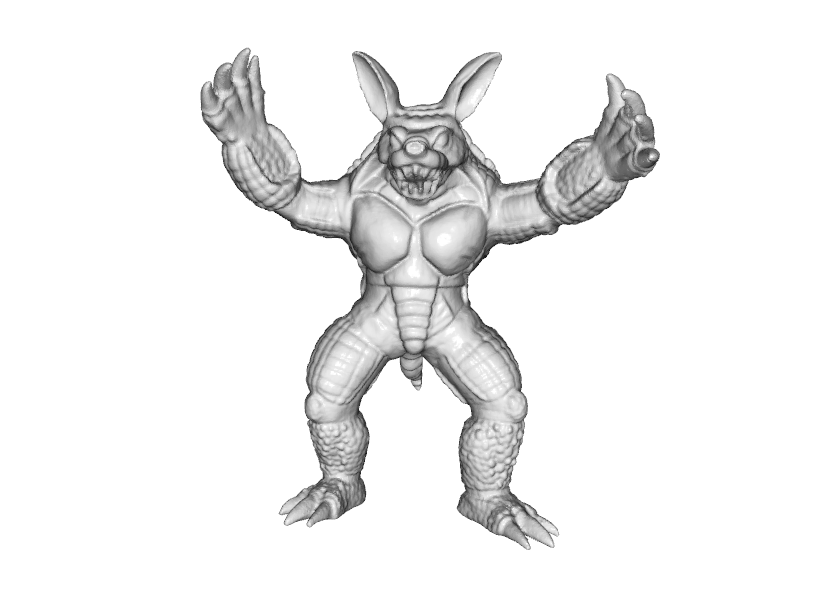

In [3]:
print("Load a point cloud , paint it gray, and render it")
mesh = o3dtut.get_armadillo_mesh()


if draw_bit:
    o3d.visualization.draw_geometries([mesh])


### convert mesh to pointCloud

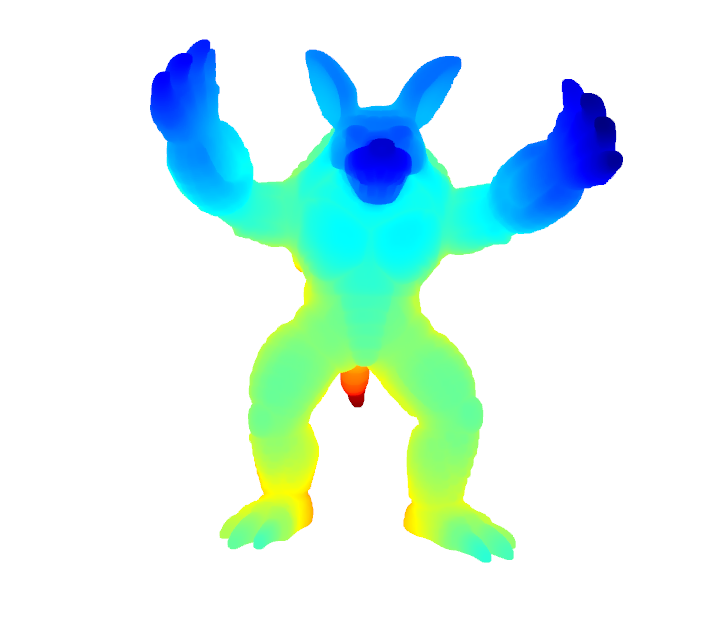

In [4]:
pcd = o3d.geometry.PointCloud()
pcd.points = mesh.vertices

if draw_bit:
    o3d.visualization.draw_geometries([pcd])

### Compute ISS Keypoints on Armadillo

In [5]:
## %%time
tic = time.time()
keypoints = o3d.geometry.keypoint.compute_iss_keypoints(pcd)
toc = 1000 * (time.time() - tic)
print("ISS Computation took {:.0f} [ms]".format(toc))
print(f"Shape of original point cloud is: {np.asarray(pcd.points).shape}\nShape of its keypoints is: {np.asarray(keypoints.points).shape}")

ISS Computation took 675 [ms]
Shape of original point cloud is: (172974, 3)
Shape of its keypoints is: (1397, 3)


### Visualizing the key-points

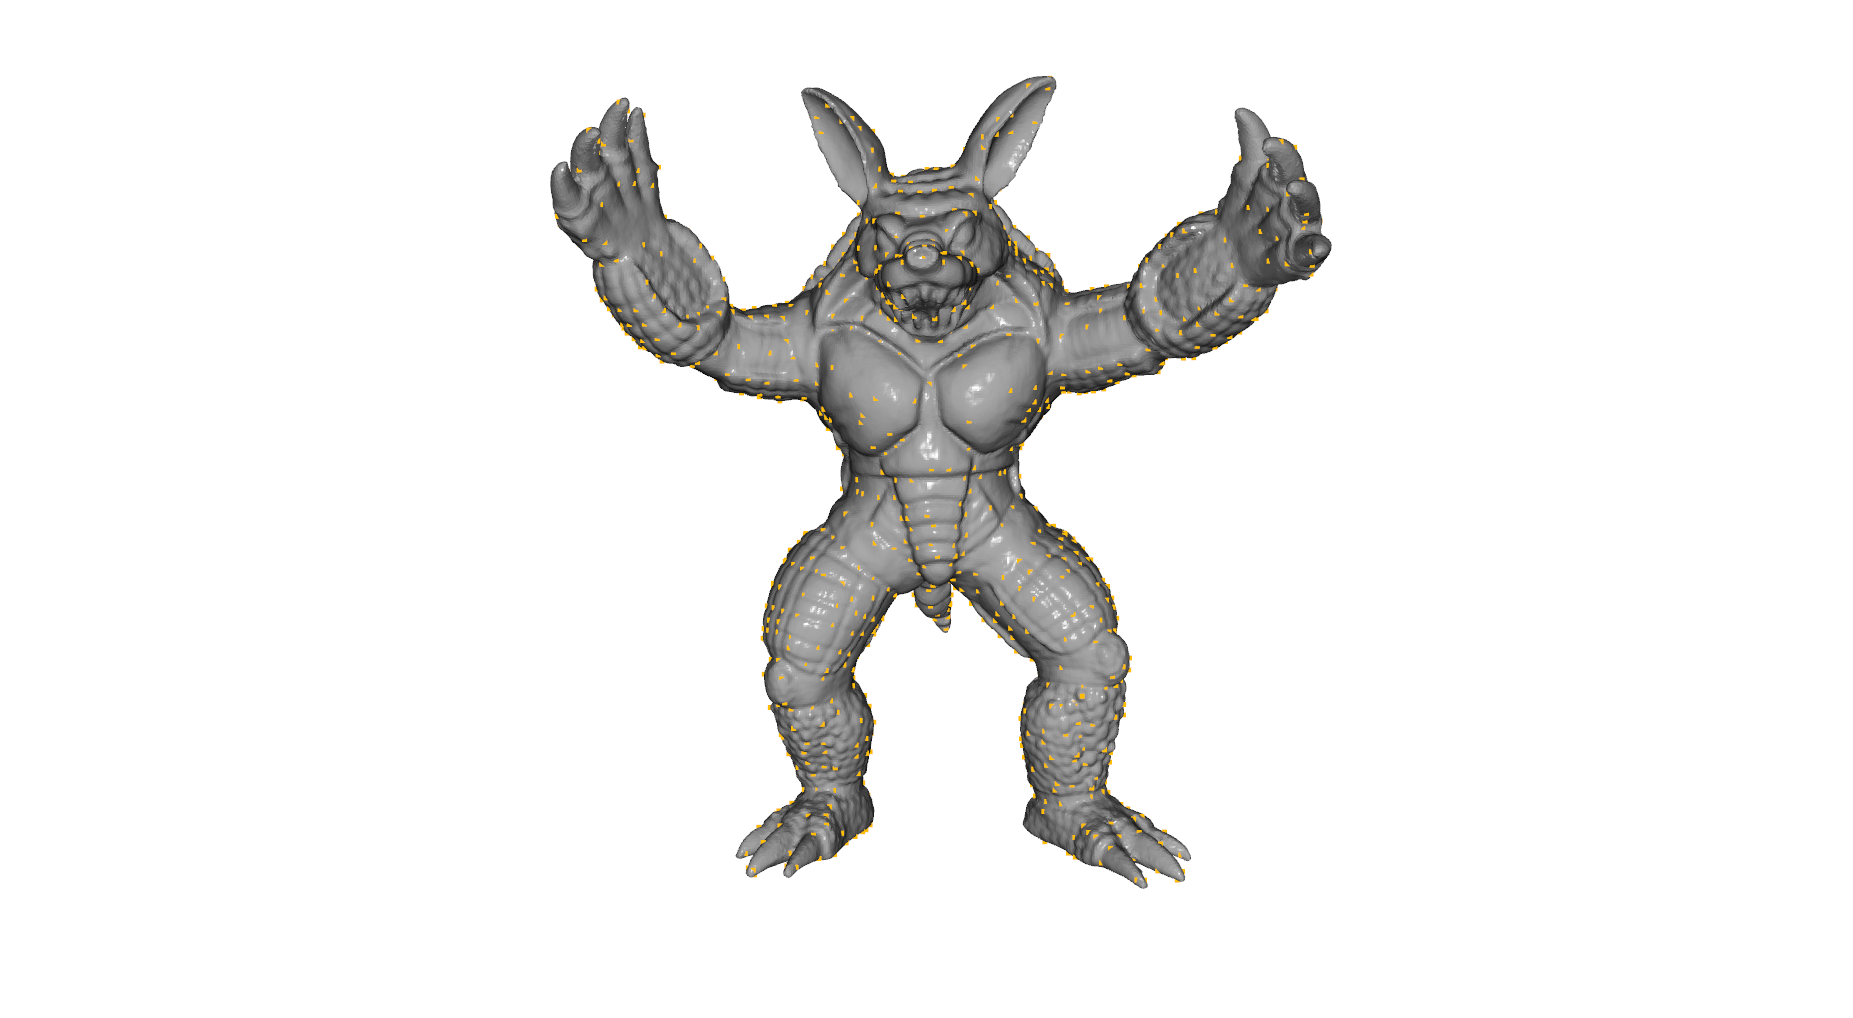

In [8]:
mesh.compute_vertex_normals()
mesh.paint_uniform_color([0.5, 0.5, 0.5])
keypoints.paint_uniform_color([1.0, 0.75, 0.0])
o3d.visualization.draw_geometries([(keypoints), mesh], front=[0, 0, -1.0])

### Compute ISS Keypoints on Stanford Bunny


ISS Computation took 61 [ms]


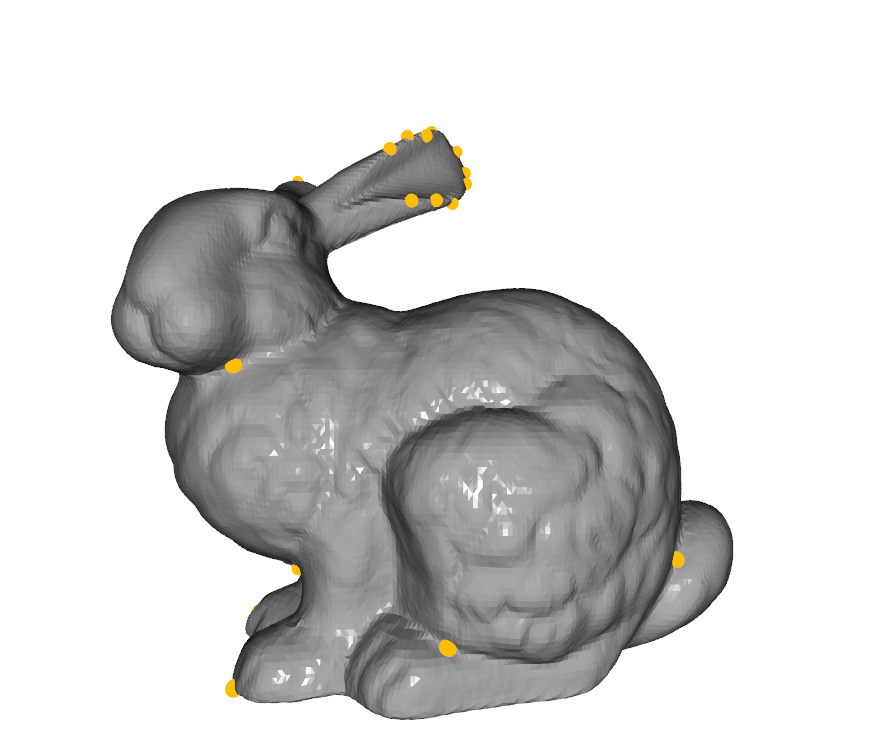

In [13]:
mesh1 = o3dtut.get_bunny_mesh() #get_armadillo_mesh() #
pcd1 = o3d.geometry.PointCloud()
pcd1.points = mesh1.vertices

tic1 = time.time()
# Compute ISS keypoints, changing the default parameters
keypoints_bunny = o3d.geometry.keypoint.compute_iss_keypoints(pcd1,
                                                        salient_radius=0.005,
                                                        non_max_radius=0.005,
                                                        gamma_21=0.5,
                                                        gamma_32=0.5)
toc1 = 1000 * (time.time() - tic1)
print("ISS Computation took {:.0f} [ms]".format(toc1))

mesh1.compute_vertex_normals()
mesh1.paint_uniform_color([0.5, 0.5, 0.5])
o3d.visualization.draw_geometries([keypoints_to_spheres(keypoints_bunny), mesh1])